In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr

In [46]:
def V(x):
    return -np.log(1+np.sin(x*x))

In [47]:
X = []
def chaine1(N,k):
    #N:taille de l'espace d'état
    #Renvoie X_k où (X_n) CM de proba de transiton P et de proba invariante pi
    x=np.floor(21*npr.rand())
    for _ in range(k):
        if npr.rand()<0.5:
            y=(x-1)%(N+1)
        else:
            y=(x+1)%(N+1)
        alpha=min(1,np.exp(V(x)-V(y)))
        if npr.rand()<alpha:
            x=y
            X.append(int(x))
    return int(x),X

[ 47. 113.  23.  82.  45.  51.   0.   1. 119.  23.  28. 128.  28.  22.
 117.   5.   0.  57.  35.  64.  12.]


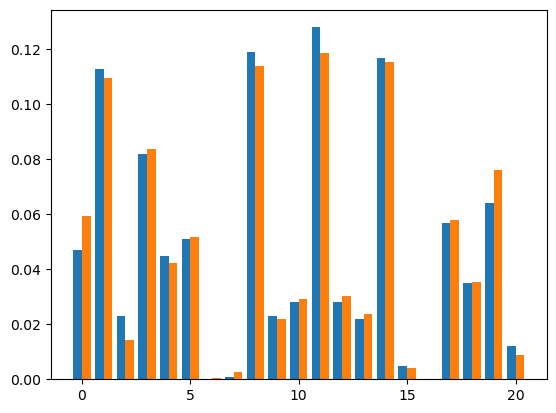

In [37]:
N=20 #Taille espace d'état
M=1000 #Nb de simulations
E=np.arange(0,N+1,1)
res=np.zeros(21)
for _ in range(M):
    res[chaine1(N,100)[0]]+=1
print(res)
plt.bar(E-0.2,res/M,width=0.4)
p=np.array([np.exp(-V(n)) for n in range(0,21)])
pi=p/sum(p)
plt.bar(E+0.2,pi,width=0.4)
plt.show()

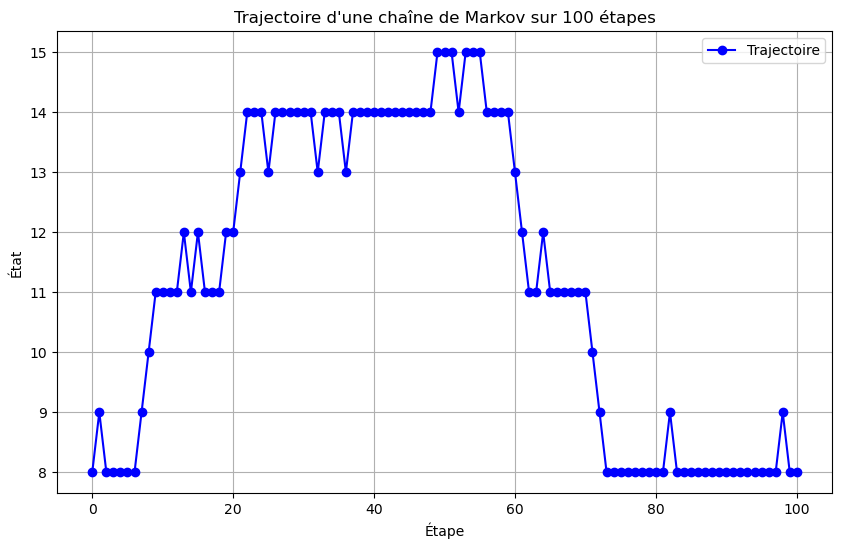

In [41]:
# Simuler une trajectoire
npr.seed(1)
# Paramètres de la simulation
N = 20  # Taille de l'espace d'état
k = 100  # Nombre d'étapes de la chaîne


npr.seed(1)
# Fonction de la chaîne de Markov
def chaine1(N, k):
    # Initialisation
    x = np.floor((N + 1) * npr.rand())  # État initial aléatoire
    trajectoire = [int(x)]  # Liste pour enregistrer la trajectoire

    # Simulation de la chaîne pendant k étapes
    for _ in range(k):
        if npr.rand() < 0.5:
            y = (x - 1) % (N + 1)  # Transition à gauche
        else:
            y = (x + 1) % (N + 1)  # Transition à droite

        # Calcul du critère d'acceptation
        alpha = min(1, np.exp(V(x) - V(y)))
        if npr.rand() < alpha:
            x = y  # Accepter la transition

        # Enregistrement de l'état courant
        trajectoire.append(int(x))

    return trajectoire
trajectoire = chaine1(N, k)

# Tracer la trajectoire
plt.figure(figsize=(10, 6))
plt.plot(trajectoire, marker='o', linestyle='-', color='b', label='Trajectoire')
plt.title(f'Trajectoire d\'une chaîne de Markov sur {k} étapes')
plt.xlabel('Étape')
plt.ylabel('État')
plt.grid(True)
plt.legend()
plt.show()


### Algorithm d'Ising

correction du prof

In [25]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import time

In [2]:
# Définie une configuration aléatoire de taile N*K avec une proportion p de +1 et 1-p de -1
def Conf_Random(N,K,p):
    conf=np.zeros((N,K))
    for k in range(N):
        for l in range(K):
            conf[k][l]=2*(npr.rand()<p)-1    
    return conf 

In [3]:
# Calcul la différence de potentielle de deux configurations voisines (pas de potentiel pour optimiser)
def Diff_Potentiel(conf_initiale,N,K,i,j):
    diff=4*conf_initiale[i][j]*(conf_initiale[(i+1)%N][j]+conf_initiale[(i-1)%N][j]+conf_initiale[i][(j+1)%K]+conf_initiale[i][(j-1)%K])
    return diff

In [4]:
# Algo de Metropolis, n itérations, beta inverse de la température
def Metropolis(conf_initiale,n,beta):
    M=conf_initiale
    (N,K)=np.shape(conf_initiale)
    for k in range(n):
        i=npr.choice(range(N))
        j=npr.choice(range(K))
        u=npr.rand()
        diff=Diff_Potentiel(M,N,K,i,j)
        epsilon=1-2*(u<np.exp(- beta*diff))
        M[i][j]=epsilon*M[i][j]
    return M
    

24.177273511886597


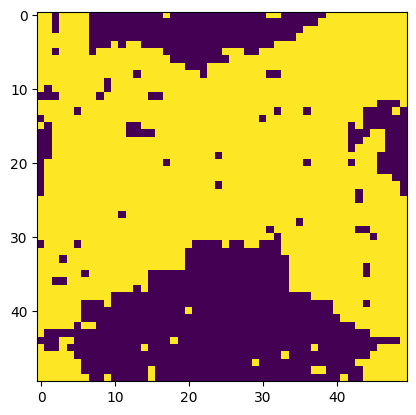

In [5]:
# test
N=50
K=50 
beta=0.26
n=320000

# Evalution du temps de calul en fonction de n  (20 secondes sur mon PC ici environ)
M0=Conf_Random(N,K,0.5)
t0=time.time()
M1=Metropolis(M0,n,beta)
t1=time.time()
print(t1-t0)
# Affichage
plt.imshow(M1)

In [6]:
# Aimantation moyenne en fonction de beta=b, courbe théorique
def f_critique(b):
    # valeur du beta critique (transition de phase) environ 0.22
    beta_critique=0.5*np.log(1+np.sqrt(2))/2
    if (b<=beta_critique):
            y=0
    else :
        y=   np.power((1-(1/np.sinh(2*2*b))),1/8) 
    return y

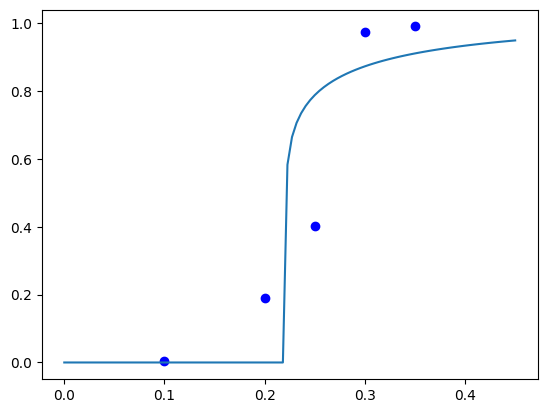

249.40610551834106


In [10]:
# Aimantation moyenne en fonction de beta, courbe obtenue avec le thm ergodique    
# beta liste de beta
# conf de taille N*K
# n0 nombre d'itération de Metropolis partant d'une conf uniforme générant la configuration initiale
# n nombre de termes pris en compte dans la moyenne empirique (du thm ergodique) pour estimer l'aimantation moyenne en partant de la conf initiale précédente 
def Aimantation_Moyenne_Ergodic(beta,N,K,n,n0):
    L=N*K
    M0=Conf_Random(N,K,0.50)
    # C stoque les résultats pour different beta=b de l'aimantation moyenne
    C=[]
    for b in beta:
        # M Conf initiale
        M=Metropolis(M0,n0,b)
        # a aimantation moyenne de la conf initiale
        a=np.sum(M)/L
        # c aimantation moyenne cumulée initiale
        c=np.sum(M)/L
        for k in range(n):
            i=npr.choice(range(N))
            j=npr.choice(range(K))
            u=npr.rand()
            diff=Diff_Potentiel(M,N,K,i,j)
            # B=1 si on accepte la proposition, B=0 sinon
            B=(u<np.exp(- b*diff))
            # Si B=1 l'aimantation moyenne augmente ou diminue de 2/L selon qu'il y avait un -1 ou un +1 en (i,j) dans la conf précédente
            a=a+B*(2*(M[i][j]<0)-1)*(2/L)
            # on incrémente l'aimantation cumulée
            c=c+a
            # On met à jour la nouvelle configuration 
            epsilon=1-2*(u<np.exp(- b*diff))
            M[i][j]=epsilon*M[i][j]
        # On fait la moyenne de l'aimantation cumulée (simme de n+1 termes dans le thm ergodique)    
        C.append(np.abs(c)/(n+1))
    # On affiche la courbe théorique
    beta_min=np.min(beta)
    beta_max=np.max(beta)
    
    t=np.linspace(np.max(beta_min-0.1,0),beta_max+0.1,100)
    y=[]
    for b in t:
        y.append(f_critique(b))
    
    plt.plot(t,y)            
    # On affiche les points expérimentaux
    plt.scatter(beta,C, label='Points', color='blue', marker='o')    
    plt.show()    
    
# test (260 secondes sur pc bureau)
t0=time.time()            
Aimantation_Moyenne_Ergodic([0.1,0.2,0.25,0.3,0.35],50,50,320000,320000)            
t1=time.time()
print(t1-t0)    


### Application en Optimisation: Méthode de recuit simulé

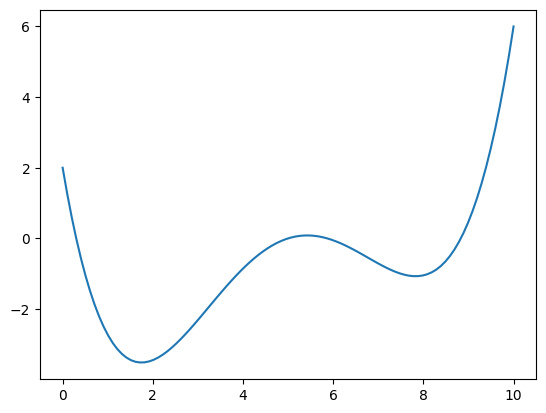

In [ ]:
N= 10
#le potentielle
def v_potentiel(k,N):
    return (4*(k/N)-2)**4 - 3*(4*(k/N)-2)**2 + 4*(k/N)-2

k = np.linspace(0, 10, 100)
y = v_potentiel(k,N)
plt.plot(k, y)
plt.show()



In [2]:
def potentiel(k,N): #fonction potentiel donnée
    return (4*k/N-2)**4-3*(4*k/N-2)**2+4*k/N-2

def recuit_sim(x0,N,it,h):
    X=[x0] #chaine de markov commençant à l'état x0
    etat=x0 
    for i in range(it):
        #calcul de l'état intermédiaire y_p
        U=npr.rand() #simulation d'une v.a uniforme
        if(U<=0.5):
            etat=(etat-1)%(N+1) #on utilise le modulo pour gérer le cas où l'état passe de l'état 0 à -1 pour qu'il revienne en N
        else :
            etat=(etat+1)%(N+1) #on utilise le modulo pour gérer le cas où l'état passe de l'état N à N+1 pour qu'il revienne en 0
        delta_V=potentiel(etat,N)-potentiel(X[i],N) #calcul de la variation de potentiel
        T=h/np.log(i+2)
        alpha=np.minimum(1,np.exp(-delta_V/T))
        U=npr.rand()
        if(U<=alpha):
            X.append(etat)
        else:
            etat=X[i] #on reste sur place
            X.append(etat)
    return X

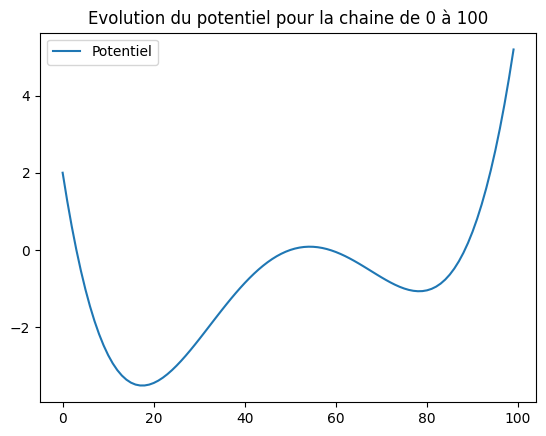

Text(0.5, 1.0, 'Evolution des états selon h')

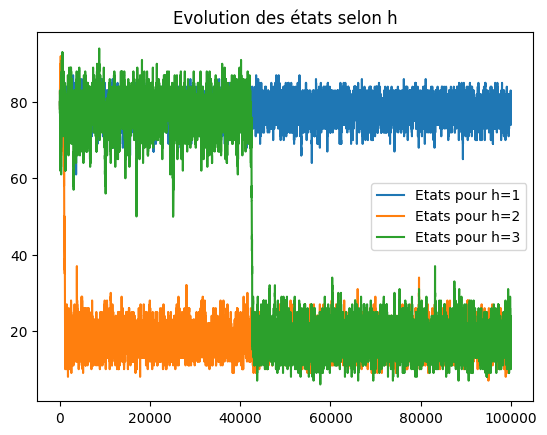

In [3]:

N=100 #nombre d'état allant de 0 à N
iteration=100000 #nombre d'itérations que l'on fait
R_S=recuit_sim(80,N,iteration,1)  #algo calculé en partant de 80
plt.plot([potentiel(i,100) for i in range(100)],label="Potentiel")
plt.legend(loc="best") #pour faire apparaitre la légende
plt.title("Evolution du potentiel pour la chaine de 0 à "+str(N))
plt.show() #permet de tracer un autre graphique après
plt.plot(R_S, label="Etats pour h=1")
plt.plot(recuit_sim(80,N,iteration,2),label="Etats pour h=2")
plt.plot(recuit_sim(80,N,iteration,3),label="Etats pour h=3")
plt.legend(loc="best")
plt.title("Evolution des états selon h")
